In [67]:
import os
import pandas as pd
import pickle
import numpy as np
from matplotlib import pyplot as plt
import torch

%matplotlib inline

In [77]:
main_folder = "/data/akvasov"
proj_direc = "bm3il"
exper_path = "buildILGymEnvsRT/data"
env_name = 'simple_tag'#'multi_speaker_listener'#'multi_speaker_listener'#"multi_speaker_listener"#"simple_spread"
time = '27_08_2021_20:06:42'#'10_08_2021_21:00:01'#'collect_samples/06_08_2021_14:15:36'#'collect_samples/10_06_2021_21:19:03/'#'collect_samples/05_08_2021_22:50:24'# 05_07_2021_21:34:34
imit_name = 'GAILac3' # 'vanilaMAAC'
data_file = os.path.join(main_folder,
    proj_direc,exper_path, env_name, time, env_name+"_" + imit_name + ".pkl")
maac_best = False
if maac_best:
    data_file = os.path.join(main_folder, "MAAC", "models", env_name, "maac_def", "run1", "model.pt")

In [78]:
data_file

'/data/akvasov/bm3il/buildILGymEnvsRT/data/multi_speaker_listener/10_08_2021_21:00:01/multi_speaker_listener_GAILac3.pkl'

In [79]:
try:
    df = pd.read_pickle(data_file)
    Ts = 6000
except:
    df_r = pd.read_pickle(data_file.split('.pkl')[0] + '_rewards.pkl')
    df = df_r
    Ts = 1400

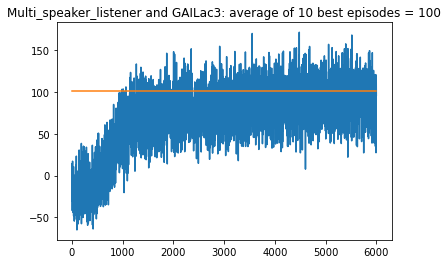

In [81]:
means = df["reward"].apply(lambda x: np.mean(x) if type(x) != type(1) else x).values
plt.plot(np.arange(Ts), means[:Ts])
N = 10
l = np.convolve(means, np.ones(N)/N, mode='valid')[-100:]
plt.plot((0, Ts), [l.max()]*2)
_ = plt.title(f"{env_name.capitalize()} and {imit_name}: "+"average of 10 best episodes = %d" % l.max())

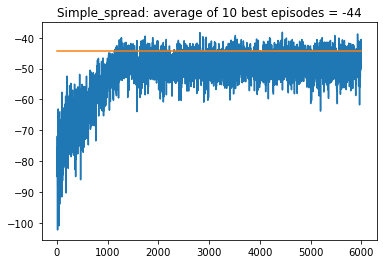

In [64]:
means = df["reward"].apply(lambda x: np.mean(x) if type(x) != type(1) else x).values
plt.plot(np.arange(Ts), means[:Ts])
N = 10
l = np.convolve(means, np.ones(N)/N, mode='valid')[-100:]
plt.plot((0, Ts), [l.max()]*2)
_ = plt.title(f"{env_name.capitalize()}: "+"average of 10 best episodes = %d" % l.max())

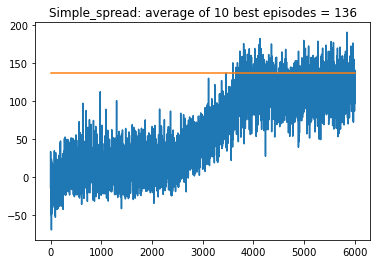

In [48]:
means = df["reward"].apply(lambda x: np.mean(x) if type(x) != type(1) else x).values
plt.plot(np.arange(6000), means[:6000])
N = 10
l = np.convolve(means, np.ones(N)/N, mode='valid')[-100:]
plt.plot((0, 6000), [l.max()]*2)
_ = plt.title(f"{env_name.capitalize()}: "+"average of 10 best episodes = %d" % l.max())

-44.16426546962042

In [251]:
column_name = 'agent0_rews'
df_cumsumr = df_r[column_name].apply(lambda x: (x[0].reshape(-1, 25) + 0.99**np.arange(25)[::-1]).cumsum())
df_cumsumr.apply(lambda x: x[-1])

ValueError: cannot reshape array of size 1 into shape (25)

In [252]:
column_name = 'agent0_rews'
df_rewards = df_r[column_name].apply(lambda x: x[0].reshape(-1, 25))
x = np.concatenate(df_rewards.to_numpy()).reshape(df_rewards.size, -1, 25)
x[:,0, -3:]

ValueError: cannot reshape array of size 1 into shape (25)

(6000, 25)

In [223]:
x[500:600, -1], np.concatenate(df_rewards.to_numpy()).reshape(df_rewards.size, -1, 25)[500:600,-1,-1]

(array([-31.980213, -30.815992, -30.40971 , -27.206747, -34.971714,
        -33.06212 , -36.03675 , -34.371346, -34.402412, -34.169388,
        -38.639935, -28.449636, -42.108944, -36.985588, -31.121853,
        -38.050907, -30.084541, -34.016224, -38.220894, -37.522526,
        -39.195724, -34.146614, -30.280642, -31.465029, -30.517366,
        -34.859886, -34.49306 , -36.96074 , -34.540497, -31.86321 ,
        -40.43752 , -41.487984, -40.3603  , -34.566483, -43.533127,
        -39.996304, -48.62721 , -32.69574 , -45.389736, -33.537827,
        -30.70575 , -42.27048 , -31.40338 , -31.496674, -35.812687,
        -39.444748, -33.499935, -34.402466, -36.775623, -33.468094,
        -38.9134  , -30.416416, -38.261364, -45.87173 , -41.23499 ,
        -41.252922, -43.224815, -46.750763, -37.64433 , -42.301323,
        -33.03033 , -38.465927, -45.080975, -43.28434 , -33.77029 ,
        -33.76611 , -39.836246, -44.477074, -37.722797, -38.548046,
        -34.69275 , -38.92377 , -38.000744, -42.

In [253]:
column_name = 'agent0_TD'
df_qvalsr = df_r[column_name].apply(lambda x: x[0].reshape(-1, 25))
x = df_qvalsr.apply(lambda x: x[-1]) # take only 1 episode for q values

# plt.plot(np.arange()x.values.T)
x = np.concatenate(x.to_numpy()).reshape(-1, 25)
_ = plt.plot(x[-200::10].T)

KeyError: 'agent0_TD'

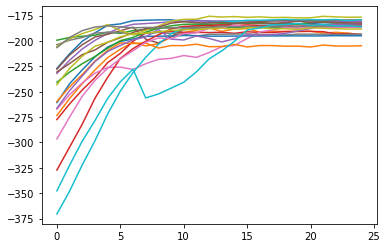

In [170]:
column_name = 'agent0_'
df_qvalsr = df_r[column_name].apply(lambda x: x[0].reshape(-1, 25))
x = df_qvalsr.apply(lambda x: x[-1]) # take only 1 episode for q values

# plt.plot(np.arange()x.values.T)
x = np.concatenate(x.to_numpy()).reshape(-1, 25)
_ = plt.plot(x[-200::10].T)

In [91]:
import os.path, time
print("Last modified: %s" % time.ctime(os.path.getmtime(data_file)))
print("Created: %s" % time.ctime(os.path.getctime(data_file)))

Last modified: Wed May 12 22:07:59 2021
Created: Wed May 12 22:07:59 2021


In [44]:
from datetime import datetime

# dd/mm/YY_H:M:S
dt_string = datetime.now().strftime("%d/%m/%Y_%H:%M:%S")
print("date and time =", dt_string)


date and time = 12/05/2021_18:09:10


In [1]:
import gym
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('Breakout-v0') # insert your favorite environment
render = lambda : plt.imshow(env.render(mode='rgb_array'))
env.reset()
render()


DependencyNotInstalled: No module named 'atari_py'. (HINT: you can install Atari dependencies by running 'pip install gym[atari]'.)